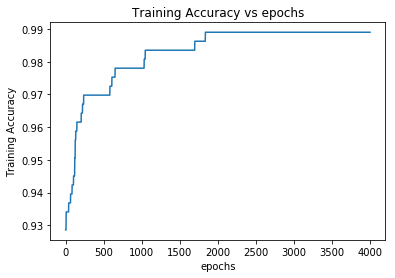

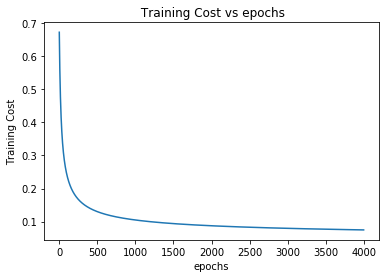

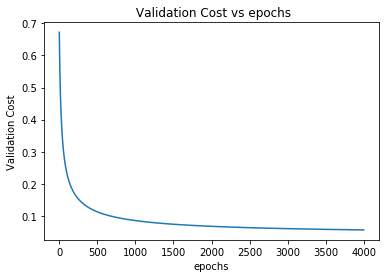

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286


In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 18 11:28:36 2019

@author: Srikanth Ammineni
"""
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Importing dataset
dataset=pd.read_csv('wdbc.dataset', delimiter = ',', header=None )
dataset=dataset.iloc[:, 1:32]
X=dataset.iloc[:, 1:32].values
y=dataset.iloc[:, 0].values


#Labelling Target Variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
y=le.transform(y)
y = y[:, np.newaxis]

#Diving dataset into Train, Test & Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


#Feature Scaling    
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

#Adding dummy feature of all 1's for bias
X_train=np.insert(X_train, 0, 1, axis=1)
X_test=np.insert(X_test, 0, 1, axis=1)
X_val=np.insert(X_val, 0, 1, axis=1)


#Initializing Weights and learning rate
theta = np.zeros((X_train.shape[1], 1))
theta.shape
n=0.01

#Functions
def sigmoid_func(z):
    return (1. / (1. + np.exp(-z)))

def hypothesis(theta,x):
    return sigmoid_func(np.dot(x, theta))

def cost_func(x,y,theta):
    m=x.shape[0]
    h=hypothesis(theta , x)
    J=-(1 / m) * np.sum(y *  np.log(h) + (1 - y) * np.log(1 - h))
    return J

def gradient(theta,x,y):
    m=x.shape[0]
    h=hypothesis(theta, x)
    return (1/m) * np.dot(x.T,h-y)
     
def predict(theta,x):
    h=hypothesis(theta,x)
    for i in range(0,len(h)):
        if h[i] >= 0.5:
            h[i]=1
        else:
            h[i]=0
    return h

def get_accuracy_precision_recall(h,y):
 TP=0
 FP=0
 TN=0
 FN=0
 for i in range(0,len(h)):
    if h[i]==1 and y[i]==1:
       TP=TP+1
    elif h[i]==0 and y[i]==0:
       TN=TN+1
    elif h[i]==0 and y[i]==1:
       FN=FN+1
    elif h[i]==1 and y[i]==0:
       FP=FP+1
 accuracy_local=(TP+TN)/(TP+TN+FP+FN)
 precision_local=TP/(TP+FP)
 recall_local=TP/(TP+FN)
 return accuracy_local,precision_local,recall_local

#List Initialization
training_cost=[]
validation_cost=[]
Accuracy=[]
precision=[]
recall=[]

#Epochs
for iteration in range(4000):
    theta=theta-(n*gradient(theta,X_train,y_train))
    training_cost.append(cost_func(X_train,y_train,theta))
    validation_cost.append(cost_func(X_val,y_val,theta))
    p=predict(theta,X_train)
    accuracy,precision,recall=get_accuracy_precision_recall(p,y_train)
    Accuracy.append(accuracy)
    
#Plot Training Accuracy vs epochs
plt.plot(np.arange(len(Accuracy)),Accuracy)
plt.title('Training Accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('Training Accuracy')
plt.show();


#Plot Training Cost vs epochs
plt.plot(np.arange(len(training_cost)),training_cost)
plt.title(' Training Cost vs epochs')
plt.xlabel('epochs')
plt.ylabel('Training Cost')
plt.show();

#Plot Validation Cost vs epochs
plt.plot(np.arange(len(validation_cost)),validation_cost)
plt.title(' Validation Cost vs epochs')
plt.xlabel('epochs')
plt.ylabel('Validation Cost')
plt.show();

#Accuracy, precision, recall for test data
p=predict(theta,X_test)
accuracy,precision,recall=get_accuracy_precision_recall(p,y_test)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
